# IMPORTING MODULES

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# IMPORTING DATASET

In [135]:
df=pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
df.tail()

,review,sentiment
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative
499,Such a joyous world has been created for us in...,positive


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     500 non-null    object
 1   sentiment  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


# DATA PREPROCESSING

In [136]:
def cleaning(var):
    s=' '
    var=var.lower()
    var=var.split(' ')
    var=[word for word in var if word not in stopwords.words('english')]
    s=s.join(var)
    return s

In [137]:
df['review']=df['review'].apply(cleaning)

<Figure size 1500x1200 with 0 Axes>

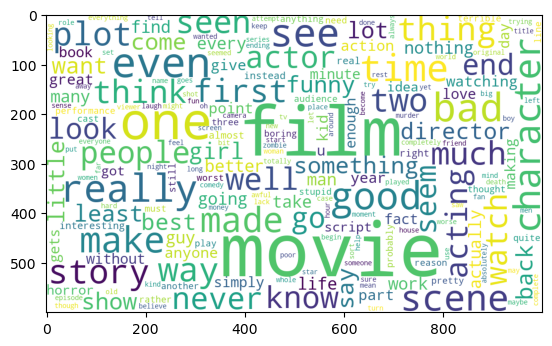

<Figure size 1500x1200 with 0 Axes>

In [101]:
from wordcloud import WordCloud
rev=' '.join(word for word in df['review'][df['sentiment']=='negative'].astype(str))
wordcloud=WordCloud(width=1000,height=600,max_font_size=150,background_color='white')
plt.imshow(wordcloud.generate(rev))
plt.figure(figsize=(15,12))

<Figure size 1500x1200 with 0 Axes>

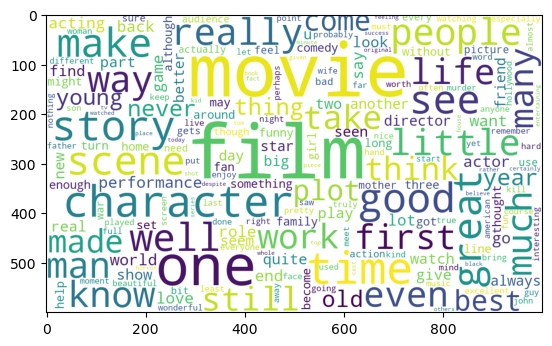

<Figure size 1500x1200 with 0 Axes>

In [102]:
rev=' '.join(word for word in df['review'][df['sentiment']=='positive'].astype(str))
wordcloud=WordCloud(width=1000,height=600,max_font_size=150,background_color='white')
plt.imshow(wordcloud.generate(rev))
plt.figure(figsize=(15,12))

# FEATURE EXTRACTION 

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)

In [139]:
rev=cv.fit_transform(df['review']).toarray()

In [119]:
rev

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02152944, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [141]:
df['sentiment']=df['sentiment'].replace({'negative':0,'positive':1})

In [142]:
df['sentiment'].value_counts()

sentiment
0    263
1    237
Name: count, dtype: int64

# MODELLING

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [181]:
model=LogisticRegression()

In [182]:
x=rev
y=df['sentiment']

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [184]:
model.fit(x_train,y_train)

LogisticRegression()

In [185]:
y_pred=model.predict(x_test)

In [186]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

In [194]:
cm=confusion_matrix(y_pred,y_test,labels=model.classes_)

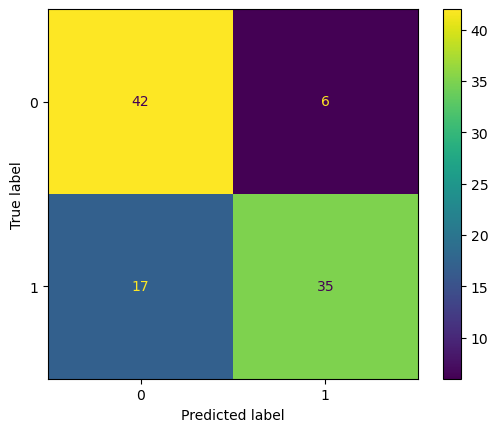

In [195]:
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
dis.plot()
plt.show()

In [193]:
accuracy_score(y_pred,y_test)

0.77

In [192]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        48
           1       0.85      0.67      0.75        52

    accuracy                           0.77       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.79      0.77      0.77       100



# EXPORTING MODEL

In [196]:
import pickle

In [197]:
pickle.dump(model,open('model.pkl','wb'))

In [198]:
pickle.dump(cv,open('scaler.pkl','wb'))